# Statistical analysis of each model

In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az

import matplotlib.pyplot as plt
import seaborn as sns

import models as m


In [6]:
# grab data
dfSCR = pd.read_csv('data/scr_clean2.csv')
dfROIs = pd.read_csv('data/neuroSynth_connectivity.csv')

In [7]:
df = pd.merge(dfSCR, dfROIs, left_on=['sub','Event.Nr'], right_on=['sub','trial'])
df['amg'] = df['amgM']

In [8]:
df.head()

,sub,Condition,Event.Nr,CDA.AmpSum,expected_value,pe,scr,amg_hipp,amg_vmpfc,amg_SnM,amgM,trial,condition,amg
0,sub-189,CSplusUS1,1,0.2852,0.801175,0.500000,0.2852,0.922353,0.880922,-0.178543,0.561003,1,CSplusUS1,0.561003
1,sub-189,CSminus1,2,0.1033,0.796939,-0.500000,0.1033,0.131659,0.645556,0.078074,-0.021780,2,CSminus1,-0.021780
2,sub-189,CSplus1,3,0.0783,0.799047,-0.501304,0.0783,0.538454,0.690040,-0.027568,-0.055494,3,CSplus1,-0.055494
3,sub-189,CSplusUS1,4,0.1772,0.801165,0.500006,0.1772,0.751307,0.846971,0.085269,-0.190930,4,CSplusUS1,-0.190930
4,sub-189,CSminus1,5,0.0000,0.794832,-0.498696,0.0000,0.824036,0.681568,0.477865,0.028911,5,CSminus1,0.028911


In [9]:
len(df['sub'].unique()) # 65

65

<AxesSubplot:xlabel='amg_hipp', ylabel='Count'>

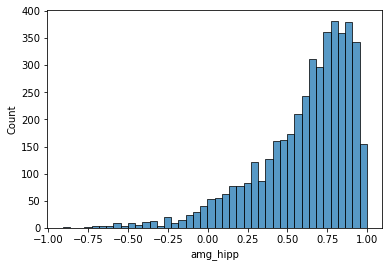

In [10]:
sns.histplot(df.amg_hipp)

# Prediction error

## Amg-Hippocampus

In [11]:
# build index for all Bayesian analysis
# Bayes model
# organize data
df['sub'] = df['sub'].astype('category')
#df['condition'] = df['condition'].astype('category')

n_sub = len(df['sub'].unique())
subIDX = df['sub'].cat.codes.values
# condition
n_cond = len(df['condition'].unique())
#condIDX = df['condition'].cat.codes.values
trials = df.trial.values - 1
amygdala = df.amg.values


df['condition'].unique()

# generating condition index
df['cond'] = df['condition']#
df = df.replace(to_replace={'cond': {'CSminus1':0, 'CSplus1':1, 'CSplusUS1':2, 'CSplus2':3, 'CSminus2':4, 'CSminusUS2':5}})

condIDX = df.cond.values

In [11]:
tracePE = m.peModel(n_sub, n_cond, subIDX, condIDX, trials, df, 'amg_hipp')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 10 jobs)
NUTS: [eps, coup_matt, sigma_coup, mu_coup, b_amg, b_trials, a_matt, sigma_a, mu_a, intercept]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 469 seconds.


In [12]:
az.summary(tracePE, var_names=['b_amg','b_coup','mu_coup'], hdi_prob=.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_amg,0.049,0.023,0.005,0.093,0.0,0.0,13886.0,5892.0,1.0
b_coup[0],0.111,0.030,0.051,0.171,0.0,0.0,8850.0,6256.0,1.0
b_coup[1],0.108,0.030,0.049,0.167,0.0,0.0,9224.0,6334.0,1.0
b_coup[2],0.113,0.029,0.056,0.173,0.0,0.0,9023.0,5847.0,1.0
b_coup[3],0.108,0.029,0.047,0.165,0.0,0.0,9440.0,6409.0,1.0
...,...,...,...,...,...,...,...,...,...
b_coup[61],0.116,0.030,0.057,0.173,0.0,0.0,8852.0,5836.0,1.0
b_coup[62],0.118,0.031,0.054,0.179,0.0,0.0,8123.0,5868.0,1.0
b_coup[63],0.112,0.029,0.055,0.172,0.0,0.0,9370.0,6159.0,1.0
b_coup[64],0.112,0.030,0.053,0.171,0.0,0.0,9922.0,5985.0,1.0


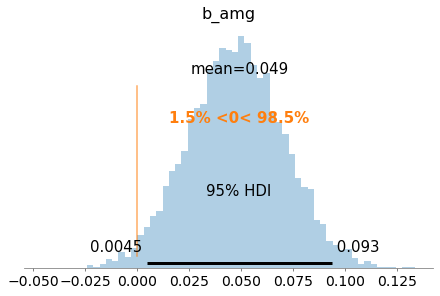

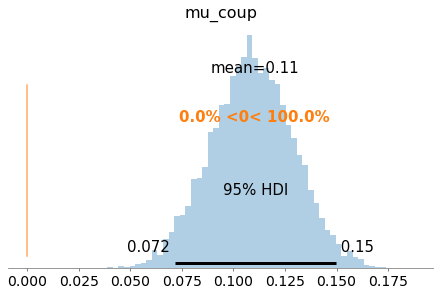

In [13]:
a = az.plot_posterior(tracePE, var_names=['b_amg'], kind='hist', ref_val=0, hdi_prob=.95)
a.figure.savefig('amygdala_posterior.png')

b = az.plot_posterior(tracePE, var_names=['mu_coup'], kind='hist', ref_val=0, hdi_prob=.95)
b.figure.savefig('amg_hippFC_posterior.png')

In [14]:
a.figure.savefig('amygdala_posterior.png')

## Amg-vmPFC

In [17]:
tracePE_vmpfc = m.peModel(n_sub, n_cond, subIDX, condIDX, trials, df, 'amg_vmpfc')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 10 jobs)
NUTS: [eps, coup_matt, sigma_coup, mu_coup, b_amg, b_trials, a_matt, sigma_a, mu_a, intercept]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 477 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [18]:
az.summary(tracePE_vmpfc, var_names=['b_amg','b_coup','mu_coup'], hdi_prob=.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_amg,0.046,0.023,-0.000,0.088,0.000,0.000,7701.0,5881.0,1.0
b_coup[0],-0.024,0.044,-0.108,0.068,0.000,0.000,8279.0,5893.0,1.0
b_coup[1],-0.065,0.047,-0.163,0.017,0.001,0.000,5611.0,6342.0,1.0
b_coup[2],-0.027,0.041,-0.110,0.057,0.000,0.000,10543.0,5724.0,1.0
b_coup[3],-0.034,0.041,-0.118,0.049,0.000,0.000,11015.0,6091.0,1.0
...,...,...,...,...,...,...,...,...,...
b_coup[61],-0.012,0.046,-0.095,0.082,0.001,0.000,5687.0,6135.0,1.0
b_coup[62],-0.025,0.045,-0.118,0.065,0.000,0.000,8488.0,6340.0,1.0
b_coup[63],-0.037,0.041,-0.120,0.048,0.000,0.000,10767.0,6214.0,1.0
b_coup[64],-0.000,0.049,-0.084,0.103,0.001,0.001,4272.0,6267.0,1.0


<AxesSubplot:title={'center':'mu_coup'}>

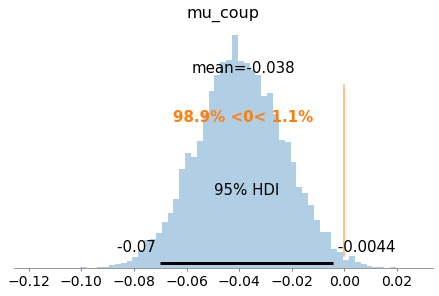

In [19]:
az.plot_posterior(tracePE_vmpfc, var_names=['mu_coup'], kind='hist', ref_val=0,
                 hdi_prob=.95).figure.savefig('amg_vmpfc_posterior.png')

# Amygdala Sensory Motor

In [11]:
tracePE_snm = m.peModel(n_sub, n_cond, subIDX, condIDX, trials, df, 'amg_SnM')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 10 jobs)
NUTS: [eps, coup_matt, sigma_coup, mu_coup, b_amg, b_trials, a_matt, sigma_a, mu_a, intercept]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 493 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [12]:
az.summary(tracePE_snm, var_names=['b_amg','b_coup','mu_coup'], hdi_prob=.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_amg,0.048,0.023,0.001,0.092,0.000,0.000,11676.0,6638.0,1.0
b_coup[0],-0.006,0.047,-0.103,0.091,0.001,0.001,8060.0,5706.0,1.0
b_coup[1],0.001,0.045,-0.091,0.093,0.000,0.001,10614.0,6286.0,1.0
b_coup[2],0.030,0.045,-0.052,0.124,0.001,0.000,6992.0,6062.0,1.0
b_coup[3],0.011,0.048,-0.084,0.115,0.000,0.001,10922.0,6210.0,1.0
...,...,...,...,...,...,...,...,...,...
b_coup[61],0.047,0.053,-0.042,0.162,0.001,0.001,4271.0,5947.0,1.0
b_coup[62],-0.012,0.048,-0.120,0.072,0.001,0.001,7410.0,5790.0,1.0
b_coup[63],-0.026,0.051,-0.136,0.065,0.001,0.001,5456.0,6313.0,1.0
b_coup[64],0.031,0.047,-0.053,0.136,0.001,0.000,6703.0,5250.0,1.0


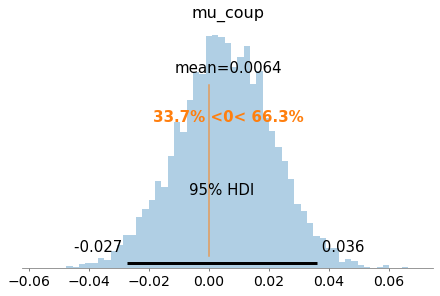

In [13]:
az.plot_posterior(tracePE_snm, var_names=['mu_coup'], kind='hist', ref_val=0,
                 hdi_prob=.95).figure.savefig('amg_sensoryMotor_posterior.png')

# Condition of trial
### Amygdala - Hippocampus

In [22]:
cond_trace = m.conditionModel(n_sub, n_cond, subIDX, condIDX, trials, df, 'amg_hipp')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, b_amg, b_trials, b_matt, sigma_b, mu_b, a_matt, sigma_a, mu_a]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 724 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [23]:
az.summary(cond_trace, var_names=['b_cond','b_matt'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_cond[0],0.285,0.353,-0.396,0.922,0.004,0.003,6753.0,5815.0,1.0
b_cond[1],0.256,0.353,-0.417,0.896,0.004,0.003,6772.0,5786.0,1.0
b_cond[2],0.347,0.353,-0.353,0.963,0.004,0.003,6778.0,5829.0,1.0
b_cond[3],0.263,0.353,-0.418,0.901,0.004,0.003,6776.0,5789.0,1.0
b_cond[4],0.271,0.353,-0.392,0.928,0.004,0.003,6761.0,5837.0,1.0
b_cond[5],0.320,0.353,-0.368,0.949,0.004,0.003,6766.0,5897.0,1.0
b_matt[0],-0.101,0.479,-1.006,0.770,0.007,0.005,4469.0,5522.0,1.0
b_matt[1],-0.783,0.559,-1.815,0.284,0.009,0.006,3828.0,5160.0,1.0
b_matt[2],1.272,0.651,0.084,2.502,0.010,0.007,4214.0,5137.0,1.0
b_matt[3],-0.609,0.526,-1.656,0.340,0.008,0.006,4307.0,4905.0,1.0


In [24]:
trStacked = cond_trace.posterior.stack(draws=('chain','draw'))


#### Remember the order to use for comparison
'CSminus1':0, 'CSplus1':1, 'CSplusUS1':2, 'CSplus2':3, 'CSminus2':4, 'CSminusUS2':5

In [25]:
trStacked.b_cond.shape

(6, 8000)

In [26]:
csminus1 = trStacked.b_cond[0,:].values
csplus1 = trStacked.b_cond[1,:].values
csPlusUS1 = trStacked.b_cond[2,:].values
csminus2 = trStacked.b_cond[4,:].values
csplus2 = trStacked.b_cond[3,:].values
csPlusUS2 = trStacked.b_cond[5,:].values
csUSboth = np.mean(np.stack([csPlusUS1, csPlusUS2]), axis=0) # averaging across USs
csall = np.mean(np.stack([csminus1,csminus2, csplus1, csplus2]), axis=0) # averaging across CSs
usVcs = csUSboth - csall

<AxesSubplot:ylabel='Count'>

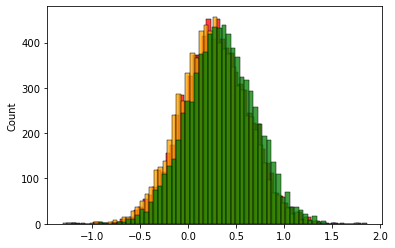

In [27]:
sns.histplot(csminus1, color='red')
sns.histplot(csplus1, color='orange')
sns.histplot(csPlusUS1, color='green')

Text(0.5, 1.0, 'CSPlusUS-CS in anterior Hippocampus')

<Figure size 1296x216 with 0 Axes>

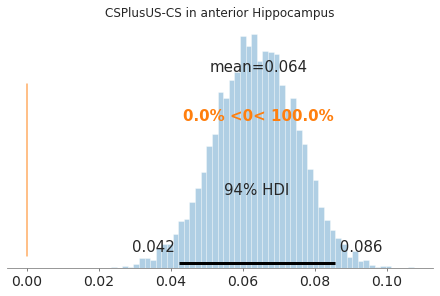

In [29]:
sns.set_style('ticks')
fig = plt.figure(figsize=(18,3))
az.plot_posterior(usVcs, point_estimate='mean', kind='hist', ref_val=0).set_title("CSPlusUS-CS in anterior Hippocampus")


In [30]:
sum(usVcs > 0)

8000

In [31]:
print(f'Standardized coeficient {np.mean(usVcs) / np.std(usVcs)}')
az.summary(usVcs)

arviz - WARNING - Shape validation failed: input_shape: (1, 8000), minimum_shape: (chains=2, draws=4)


Standardized coeficient 5.596155157590464


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.064,0.012,0.042,0.086,0.0,0.0,5828.0,5031.0,NaN


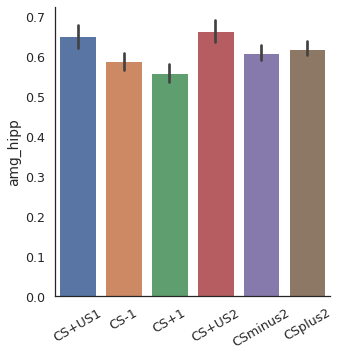

In [32]:
sns.set(font_scale = 1.15)
sns.set_style("white")
g = sns.catplot(y='amg_hipp',x='condition', data=df, kind='bar', ci=95)
g.set_xlabels("")
g.set_xticklabels(
    labels=["CS+US1", "CS-1", "CS+1", "CS+US2", "CSminus2", "CSplus2"], rotation=30)

#g.set_ylabels("Amygdala Hippocampus Coupling")
#g.savefig('coupling_different_Conditions.png', dpi=300, bbox_inches='tight')

# Use MLE


In [12]:
dfML = pd.read_csv('MLE/pe_ML.csv')

In [35]:
#dfML = pd.merge(df, dfML, left_on='sub', right_on='sub')
df['peML'] = dfML['peML']

In [36]:
df

,sub,Condition,Event.Nr,CDA.AmpSum,expected_value,pe,scr,amg_hipp,amg_vmpfc,amg_SM,amgM,trial,condition,amg,cond,peML
0,sub-189,CSplusUS1,1,0.2852,0.801175,0.500000,0.2852,0.922353,0.880922,0.250503,0.561003,1,CSplusUS1,0.561003,2,0.500000
1,sub-189,CSminus1,2,0.1033,0.796939,-0.500000,0.1033,0.131659,0.645556,0.532036,-0.021780,2,CSminus1,-0.021780,0,-0.500000
2,sub-189,CSplus1,3,0.0783,0.799047,-0.501304,0.0783,0.538454,0.690040,0.090131,-0.055494,3,CSplus1,-0.055494,1,-0.475830
3,sub-189,CSplusUS1,4,0.1772,0.801165,0.500006,0.1772,0.751307,0.846971,0.836519,-0.190930,4,CSplusUS1,-0.190930,2,0.501168
4,sub-189,CSminus1,5,0.0000,0.794832,-0.498696,0.0000,0.824036,0.681568,0.566459,0.028911,5,CSminus1,0.028911,0,-0.524170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4480,sub-152,CSplus2,65,0.0000,0.012591,-0.041406,0.0000,0.668299,0.648652,0.288710,0.262373,65,CSplus2,0.262373,3,-0.000360
4481,sub-152,CSminus2,66,0.0000,0.149719,-0.372661,0.0000,0.419242,0.506714,-0.213779,0.055292,66,CSminus2,0.055292,4,-0.423359
4482,sub-152,CSminus2,67,0.0000,0.113651,-0.284416,0.0000,0.678883,0.308139,-0.271481,0.146620,67,CSminus2,0.146620,4,-0.279172
4483,sub-152,CSplus2,68,0.0000,0.011487,-0.038340,0.0000,0.805161,0.258436,0.012690,-0.179821,68,CSplus2,-0.179821,3,-0.000237


In [37]:
import pingouin as pg

In [38]:
# testing correlation between Bayes PE and MLE PE
pg.corr(df['pe'], df['peML'])

,n,r,CI95%,p-val,BF10,power
pearson,4485,0.886144,"[0.88, 0.89]",0.0,inf,1.0


/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [39]:
with pm.Model() as model_peML:
        # adding intercept
        intercept = pm.Normal('intercept', mu=0, sigma=1)

        mu_a = pm.Normal('mu_a', mu=0, sigma=.5)
        sigma_a = pm.HalfCauchy('sigma_a', .5)
        a_matt = pm.Normal('a_matt', mu=0, sd=1, shape=n_sub)
        a = pm.Deterministic('a', mu_a + sigma_a*a_matt)


        # add trials and amygdala activation
        b_trials = pm.Normal('b_trials', mu=0, sigma=.5)
        b_amg = pm.Normal('b_amg', mu=0, sigma=.5)

        # add coupling
        #b_coup = pm.Normal('b_coup', mu=0, sigma=.5)
        mu_coup = pm.Normal('mu_coup', mu=0, sigma=.5)
        sigma_coup = pm.HalfCauchy('sigma_coup', .5)
        coup_matt = pm.Normal('coup_matt', mu=0, sd=1, shape=n_sub)
        b_coup = pm.Deterministic('b_coup', mu_coup + sigma_coup*coup_matt)


        eps = pm.HalfCauchy('eps', .5)

        # make mu a determenistic distribution so we can test later vs. actual data

        mu = pm.Deterministic('mu',intercept + a[subIDX] + b_trials*trials + b_amg*df.amg + b_coup[subIDX]*df['amg_hipp'])

        y_hat = pm.Normal('y_hat', mu=mu, sigma=eps, observed=df['peML'])


        trace_peML = pm.sample(target_accept=.95, chains=4, cores=10, return_inferencedata=True, draws=2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 10 jobs)
NUTS: [eps, coup_matt, sigma_coup, mu_coup, b_amg, b_trials, a_matt, sigma_a, mu_a, intercept]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 786 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [ ]:
az.summary(trace_peML, var_names=['b_amg','b_coup','mu_coup'], hdi_prob=.95)

In [ ]:
a = az.plot_posterior(trace_peML, var_names=['b_amg'], kind='hist', ref_val=0, hdi_prob=.95)
a.figure.savefig('amygdala_posteriorML.png')

b = az.plot_posterior(trace_peML, var_names=['mu_coup'], kind='hist', ref_val=0, hdi_prob=.95)
b.figure.savefig('amg_hippFC_posteriorML.png')